In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv
df = pd.read_csv('./data/weatherAUS.csv')

In [32]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
68447,2011-12-30,Melbourne,15.7,28.0,0.0,5.2,11.2,SSE,30.0,S,...,78.0,42.0,1019.6,1016.8,NaN,NaN,16.6,27.3,No,No
125721,2014-06-11,SalmonGums,8.7,15.0,8.2,NaN,NaN,S,44.0,SW,...,86.0,63.0,NaN,NaN,NaN,NaN,11.0,14.2,Yes,No
105548,2017-06-12,Nuriootpa,-0.2,16.0,0.0,1.7,7.9,SW,28.0,NaN,...,85.0,58.0,1031.4,1029.4,6.0,NaN,8.9,15.2,No,No
120329,2016-08-21,PerthAirport,6.6,18.0,0.6,2.0,3.8,W,52.0,NNE,...,89.0,55.0,1019.4,1015.0,8.0,6.0,9.6,16.8,No,Yes
47860,2014-04-20,Canberra,0.6,16.2,0.0,NaN,NaN,NNW,41.0,NNW,...,86.0,58.0,1018.2,1015.3,NaN,NaN,9.8,15.4,No,No


In [33]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9211 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9211 non-null   object 
 1   Location       9211 non-null   object 
 2   MinTemp        8724 non-null   float64
 3   MaxTemp        8730 non-null   float64
 4   Rainfall       8443 non-null   float64
 5   Evaporation    9202 non-null   float64
 6   Sunshine       9208 non-null   float64
 7   WindGustDir    9145 non-null   object 
 8   WindGustSpeed  9145 non-null   float64
 9   WindDir9am     8930 non-null   object 
 10  WindDir3pm     9151 non-null   object 
 11  WindSpeed9am   9207 non-null   float64
 12  WindSpeed3pm   9210 non-null   float64
 13  Humidity9am    8707 non-null   float64
 14  Humidity3pm    8715 non-null   float64
 15  Pressure9am    8729 non-null   float64
 16  Pressure3pm    8728 non-null   float64
 17  Cloud9am       8177 non-null   float64
 18  Cloud3pm

In [34]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia'])].dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

In [35]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'
    
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(date_to_season)
df = df.drop(columns=['Date'])
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
66367,MelbourneAirport,8.2,25.1,0.0,5.2,3.8,N,56.0,N,NNE,...,35.0,1015.3,1012.3,6.0,7.0,13.3,24.0,No,No,Autumn
79000,Watsonia,15.6,25.6,18.2,5.8,3.2,W,50.0,ENE,N,...,59.0,1011.6,1009.5,8.0,7.0,17.5,25.5,Yes,No,Spring
80005,Watsonia,9.8,17.8,2.0,4.0,6.2,W,59.0,W,SW,...,60.0,1012.0,1013.8,6.0,7.0,11.8,14.1,Yes,No,Spring
67935,Melbourne,4.3,14.6,0.0,1.0,8.2,WSW,22.0,WNW,SSW,...,51.0,1022.8,1020.9,2.0,1.0,6.6,13.1,No,No,Winter
79576,Watsonia,7.2,13.3,5.4,1.2,5.7,W,35.0,NW,WNW,...,69.0,1013.6,1012.9,7.0,7.0,9.3,12.1,Yes,No,Winter


<Axes: xlabel='RainTomorrow'>

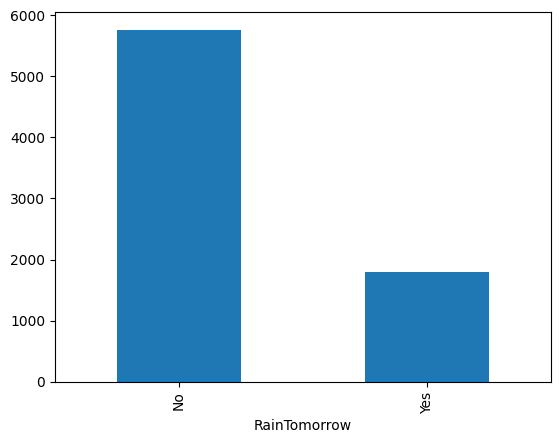

In [37]:
X = df.drop(columns=['RainTomorrow'], axis=1)
y = df['RainTomorrow']

y.value_counts().plot(kind='bar')

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [43]:
num_feats = X.select_dtypes(include=['float64', 'int64']).columns
cat_feats = X.select_dtypes(include=['object']).columns

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_feats),
        ('cat', cat_transformer, cat_feats)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20]
}

In [48]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)   

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am'...
       'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Season'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [51]:
print('Best score: ', grid_search.best_score_)
print('Best params: ', grid_search.best_params_)
print('Test score: ', grid_search.score(X_test, y_test))

Best score:  0.8521091811414392
Best params:  {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
Test score:  0.8452380952380952


In [52]:
y_pred = grid_search.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.52      0.61       358

    accuracy                           0.85      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.85      0.83      1512



<Axes: >

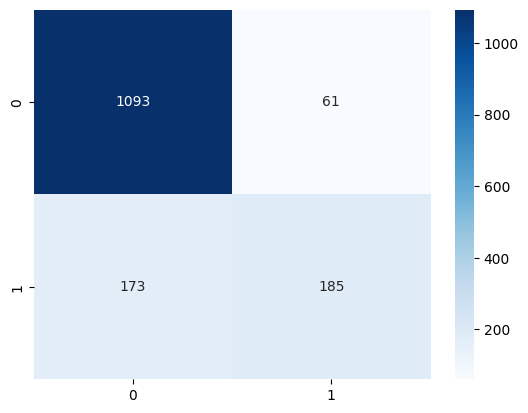

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')